<a href="https://colab.research.google.com/github/shambhaviijhaa/Ai-Projects/blob/main/Fashion_MNIST_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#step 1)import liberaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

#step 2)load data

In [ ]:
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


3)show image

In [ ]:
X_train.shape,y_train.shape, "***************",X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

3)show image

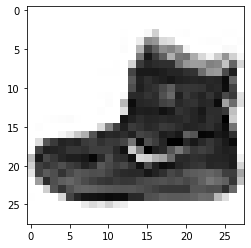

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

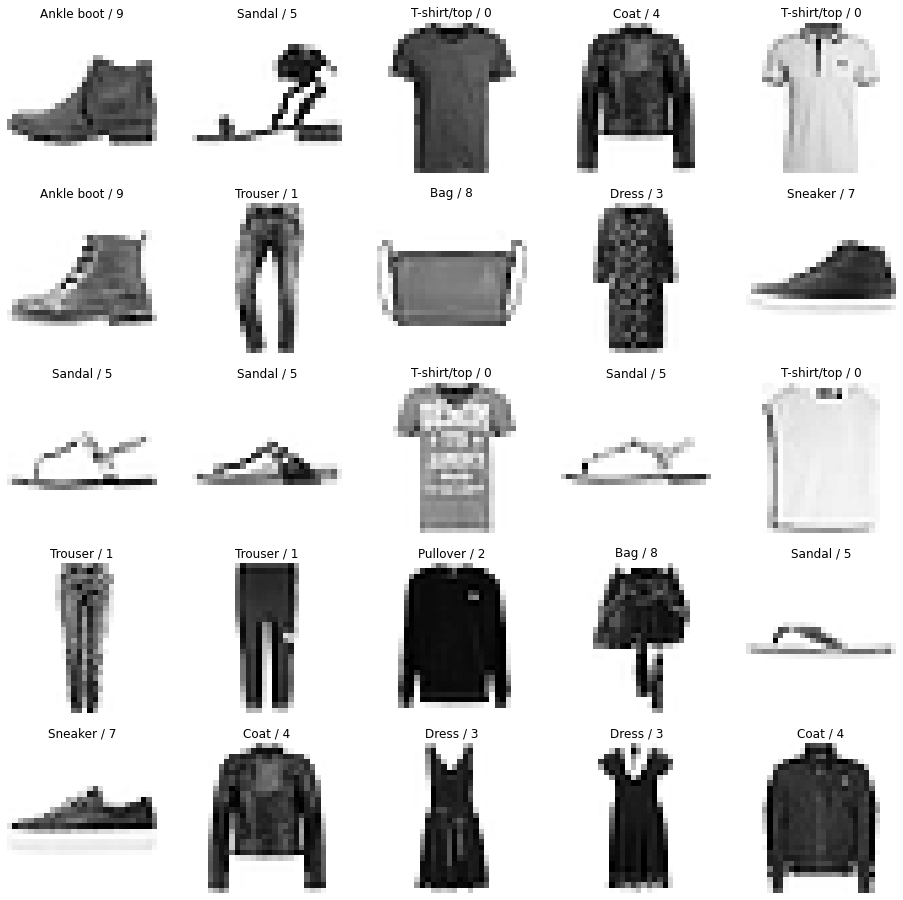

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train= np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test= np.expand_dims(X_test,-1)

feature scaling

In [ ]:
X_train = X_train /255
x_test = X_test/255

5)split dataset

In [ ]:
from re import X
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

#step 3)building the cnn model

In [ ]:
from matplotlib.cbook import flatten
model=keras.models.Sequential([
                               keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                               keras.layers.MaxPooling2D(pool_size=(2,2)),
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=128,activation='relu'),
                               keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 20s 213ms/step - loss: 0.6462 - accuracy: 0.7792 - val_loss: 0.4537 - val_accuracy: 0.8412
Epoch 2/10
94/94 [==============================] - 13s 136ms/step - loss: 0.3836 - accuracy: 0.8655 - val_loss: 0.3626 - val_accuracy: 0.8731
Epoch 3/10
94/94 [==============================] - 12s 128ms/step - loss: 0.3402 - accuracy: 0.8817 - val_loss: 0.3460 - val_accuracy: 0.8792
Epoch 4/10
94/94 [==============================] - 12s 128ms/step - loss: 0.3080 - accuracy: 0.8925 - val_loss: 0.3303 - val_accuracy: 0.8832
Epoch 5/10
94/94 [==============================] - 12s 128ms/step - loss: 0.2860 - accuracy: 0.8983 - val_loss: 0.3033 - val_accuracy: 0.8939
Epoch 6/10
94/94 [==============================] - 13s 141ms/step - loss: 0.2720 - accuracy: 0.9054 - val_loss: 0.3136 - val_accuracy: 0.8909
Epoch 7/10
94/94 [==============================] - 12s 129ms/step - loss: 0.2584 - accuracy: 0.9083 - val_loss: 0.2959 - val_accuracy: 0.8967

In [ ]:
y_pred=model.predict(X_test)
y_pred.round(2)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 60.0067 - accuracy: 0.8459


[60.00669479370117, 0.8458999991416931]

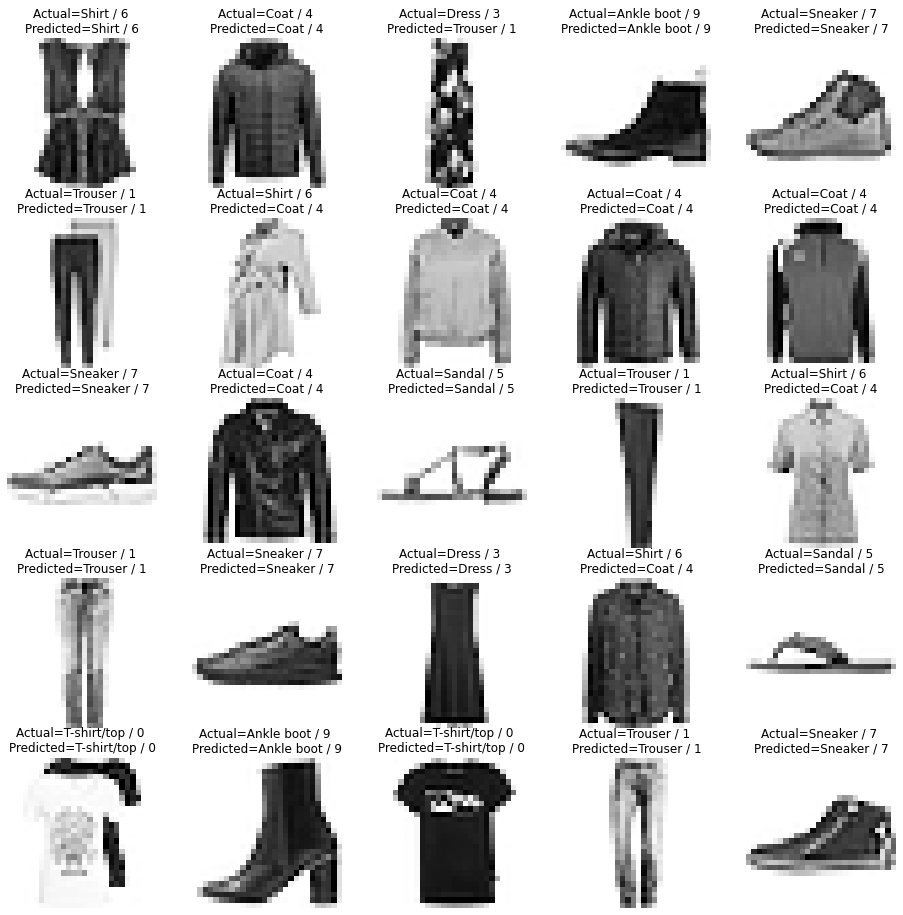

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={} / {} \nPredicted={} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

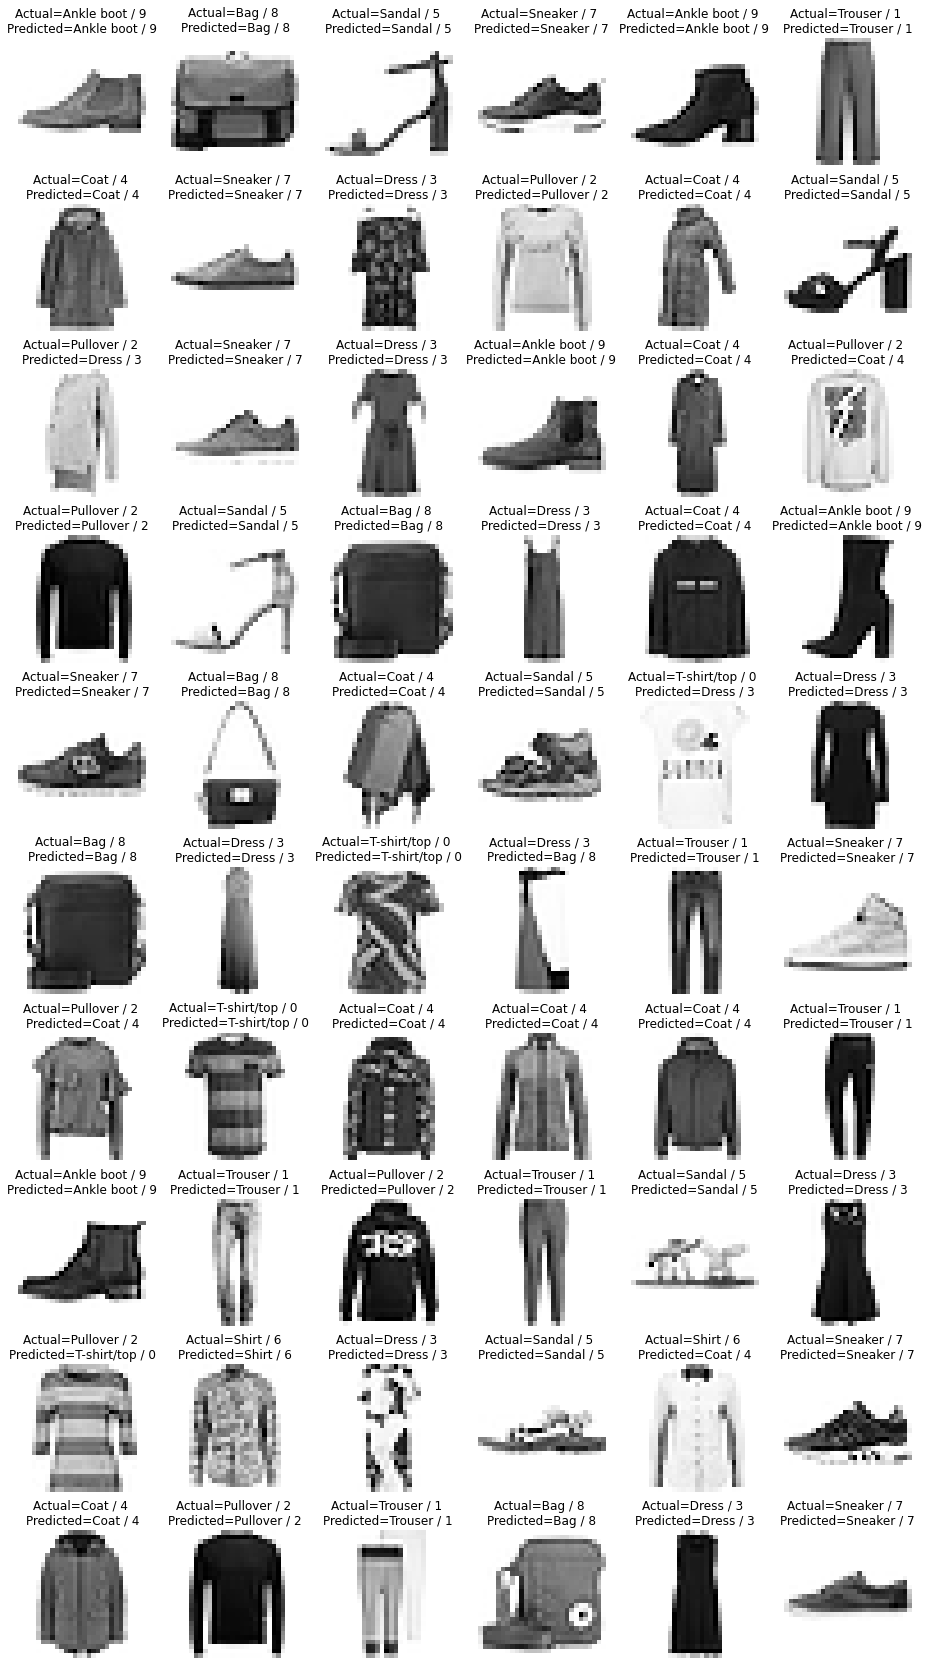

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={} / {} \nPredicted={} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

##confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.75      0.82      1000
     Trouser       0.90      0.98      0.94      1000
    Pullover       0.90      0.64      0.75      1000
       Dress       0.92      0.76      0.83      1000
        Coat       0.59      0.96      0.73      1000
      Sandal       0.86      0.99      0.92      1000
       Shirt       0.67      0.61      0.64      1000
     Sneaker       0.97      0.85      0.91      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000



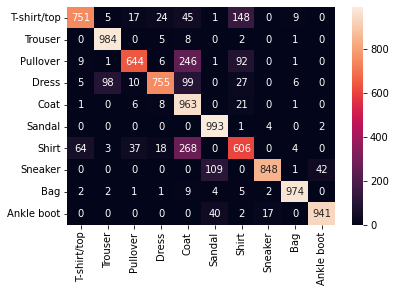

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

save model

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

# Build 2 complex CNN

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 16s 162ms/step - loss: 1.0056 - accuracy: 0.6242 - val_loss: 0.5867 - val_accuracy: 0.7738
Epoch 2/20
94/94 [==============================] - 15s 161ms/step - loss: 0.5413 - accuracy: 0.7952 - val_loss: 0.4567 - val_accuracy: 0.8289
Epoch 3/20
94/94 [==============================] - 18s 193ms/step - loss: 0.4570 - accuracy: 0.8300 - val_loss: 0.3960 - val_accuracy: 0.8540
Epoch 4/20
94/94 [==============================] - 17s 177ms/step - loss: 0.4022 - accuracy: 0.8545 - val_loss: 0.3645 - val_accuracy: 0.8673
Epoch 5/20
94/94 [==============================] - 15s 162ms/step - loss: 0.3708 - accuracy: 0.8639 - val_loss: 0.3460 - val_accuracy: 0.8708
Epoch 6/20
94/94 [==============================] - 15s 162ms/step - loss: 0.3475 - accuracy: 0.8720 - val_loss: 0.3459 - val_accuracy: 0.8706
Epoch 7/20
94/94 [==============================] - 16s 168ms/step - loss: 0.3233 - accuracy: 0.8808 - val_loss: 0.3253 - val_accuracy: 0.8790

[99.91370391845703, 0.8008000254631042]